In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

### - Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.



In [2]:
fbthai = pd.read_csv('Publicacions Facebook Thailandia.csv')
fbthai

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
fbthai.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.117163,462.625309,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.0,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.0,0.0,0.00,31.0
Column1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Veiem que les columnes 1,2,3 i 4 contenen tot de valors NaN.

In [4]:
fbthai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [5]:
fbthai.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [6]:
fbthai.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

Comprobem que els valors Nan i null són la totalitat de les variables Column1, Column2, Column3, Column4 i per tant les eliminem. La resta de variables no conté valors null o NaN.

In [7]:
fbthai = fbthai.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1)

Visualitzem ara si hi ha valors duplicats:

In [8]:
fbthai.duplicated().sum()

51

In [9]:
filas_con_duplicados = fbthai[fbthai.duplicated(keep=False)].sort_values(by=list(fbthai.columns))

# imprimir las filas con valores duplicados
print(filas_con_duplicados)

                             status_id status_type status_published  \
6172  819700534875473_1000607730118085       photo    6/7/2018 7:01   
6223  819700534875473_1000607730118085       photo    6/7/2018 7:01   
6171  819700534875473_1001982519980606       photo   6/9/2018 22:53   
6222  819700534875473_1001982519980606       photo   6/9/2018 22:53   
6170  819700534875473_1002372733274918       video   6/10/2018 3:43   
...                                ...         ...              ...   
6226   819700534875473_997075427137982      status    6/1/2018 0:35   
6174   819700534875473_998824716963053       photo    6/4/2018 6:57   
6225   819700534875473_998824716963053       photo    6/4/2018 6:57   
6173   819700534875473_999880033524188      status    6/6/2018 2:20   
6224   819700534875473_999880033524188      status    6/6/2018 2:20   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
6172           1704            21           3       1685         1

Eliminem els valors duplicats

In [10]:
fbthai1 = fbthai.drop_duplicates()

In [11]:
fbthai1.duplicated().sum()

0

In [12]:
fbthai1.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


Eliminem les columnes status_id i status_published, ja que els clusters es faran a partir de les mateixes publicacions

In [13]:
fbthai1 = fbthai1.drop(['status_id', 'status_published' ], axis=1)

In [14]:
fbthai1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


Fem un recompte dels "estats" de Facebook més freqüents:

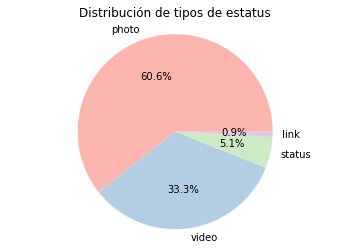

In [15]:
counts = fbthai1['status_type'].value_counts()
plt.pie(counts, labels=counts.index, colors=sns.color_palette('Pastel1'), autopct='%1.1f%%')
plt.title('Distribución de tipos de estatus')
plt.axis('equal')
plt.show()

Es pot dir que la majoria d'estats analitzats al dataset són fotos, videos i molt per sota estats i links.

Ara visualitzem els tipus de interacció per estat:

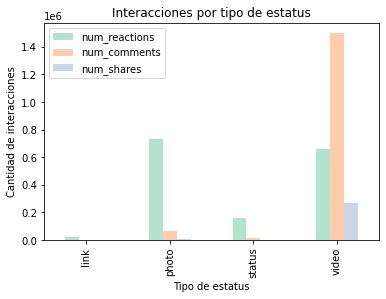

In [16]:
grouped = fbthai1.groupby('status_type').sum()[['num_reactions', 'num_comments', 'num_shares']]

sns.set_palette('Pastel2')

grouped.plot(kind='bar')
plt.title('Interacciones por tipo de estatus')
plt.xlabel('Tipo de estatus')
plt.ylabel('Cantidad de interacciones')
plt.show()

In [17]:
grouped = fbthai1.groupby('status_type').sum()[['num_reactions', 'num_comments', 'num_shares']]
grouped

,num_reactions,num_comments,num_shares
status_type,,,
link,23319,359,277
photo,731372,65678,10574
status,158944,13078,925
video,661102,1499524,269994


Podem veure que tot i que el que més es comparteix són fotos, els videos són els estats que tenen més comentaris i es comparteixen més. Les fotos reben més reaccions però es comenten poc. Els estats reben reaccions i pocs comentaris i els links en general reben poca interacció.

Visualitzem també quines reaccions solen ser més habituals en els diferents estats:

<Figure size 720x432 with 0 Axes>

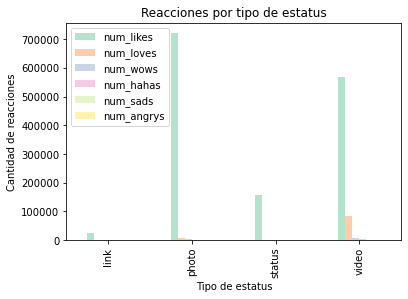

In [18]:
grouped = fbthai1.groupby('status_type').sum()[['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]
plt.figure(figsize=(10, 6))
sns.set_palette('Pastel2')
grouped.plot(kind='bar')
plt.title('Reacciones por tipo de estatus')
plt.xlabel('Tipo de estatus')
plt.ylabel('Cantidad de reacciones')
plt.show()

In [19]:
grouped = fbthai1.groupby('status_type').sum()[['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]
table = pd.pivot_table(grouped, values=['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'], index=['status_type'])
table

,num_angrys,num_hahas,num_likes,num_loves,num_sads,num_wows
status_type,,,,,,
link,0,2,23286,19,0,12
photo,169,793,721490,5748,536,2623
status,9,40,157797,549,126,423
video,593,4050,566844,82932,966,5711


Veiem que tot i que es van introduir diferents interaccions als estats de Facebook, la gent posa més likes, probablement per costum. Les fotos són les que en reben més, seguides pels videos que també reben alguns "loves".

Ara visualitzem quines correlacions hi poden haver en el dataset:

In [20]:
fbthai1.corr()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.156190,0.259640,0.994672,0.310645,0.261694,0.179657,0.082094,0.136064
num_comments,0.156190,1.000000,0.640536,0.105934,0.521320,0.163506,0.325064,0.257545,0.239557
num_shares,0.259640,0.640536,1.000000,0.179664,0.820284,0.409803,0.399864,0.218628,0.332355
num_likes,0.994672,0.105934,0.179664,1.000000,0.212715,0.200015,0.123129,0.057110,0.096276
num_loves,0.310645,0.521320,0.820284,0.212715,1.000000,0.510148,0.507899,0.226574,0.394818
num_wows,0.261694,0.163506,0.409803,0.200015,0.510148,1.000000,0.288468,0.091425,0.191672
num_hahas,0.179657,0.325064,0.399864,0.123129,0.507899,0.288468,1.000000,0.154035,0.225083
num_sads,0.082094,0.257545,0.218628,0.057110,0.226574,0.091425,0.154035,1.000000,0.143711
num_angrys,0.136064,0.239557,0.332355,0.096276,0.394818,0.191672,0.225083,0.143711,1.000000


<AxesSubplot:>

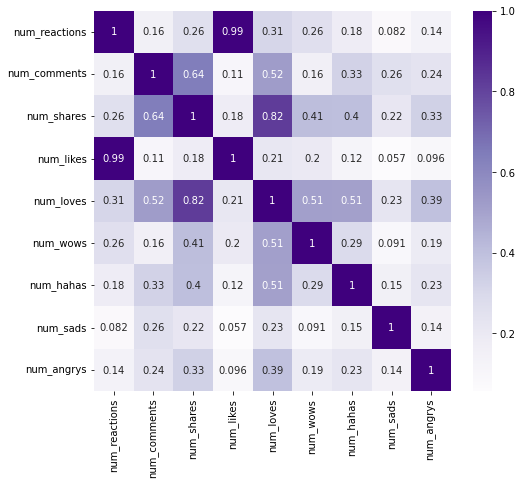

In [21]:
plt.figure(figsize=(8, 7))
sns.heatmap(fbthai1.corr(), cmap = "Purples", annot=True)

Veiem que:

   - El nombre de reaccions està molt correlacionat amb els nombre de likes
   - El nombre de loves i de comentaris està relacionat amb el nombre de shares

Grafiquem les diferents variables per veure la seva distribució i els outliers de cara al preprocessat:

<Figure size 432x288 with 0 Axes>

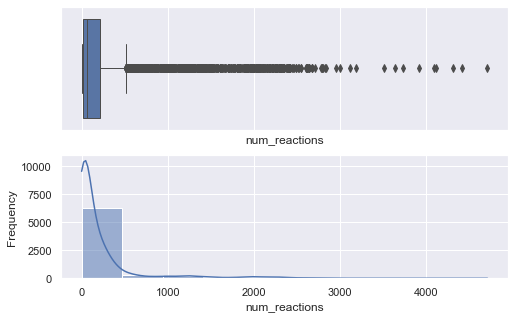

<Figure size 576x360 with 0 Axes>

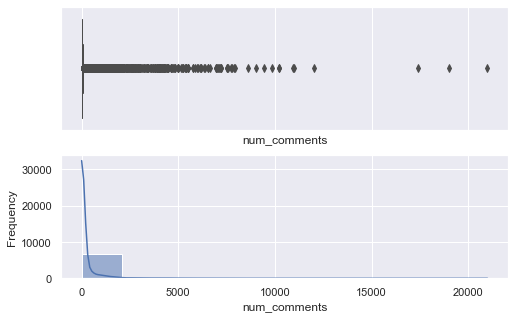

<Figure size 576x360 with 0 Axes>

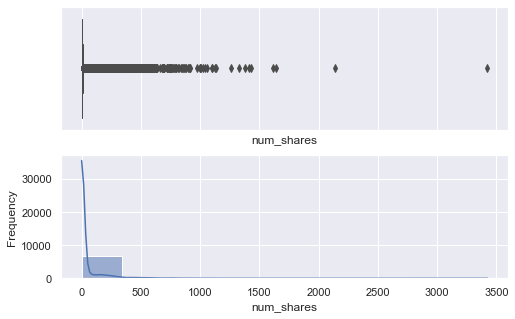

<Figure size 576x360 with 0 Axes>

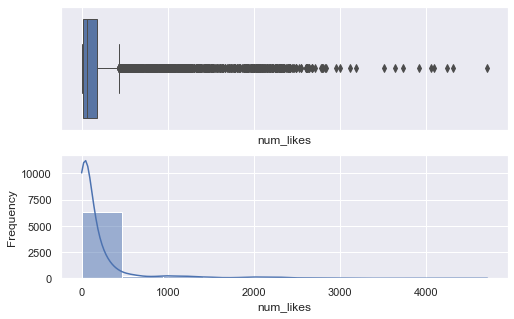

<Figure size 576x360 with 0 Axes>

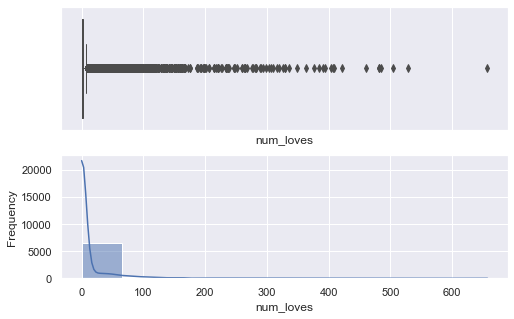

<Figure size 576x360 with 0 Axes>

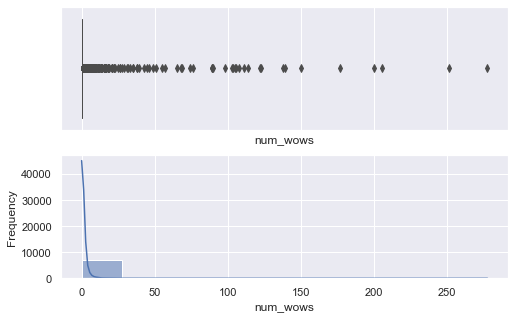

<Figure size 576x360 with 0 Axes>

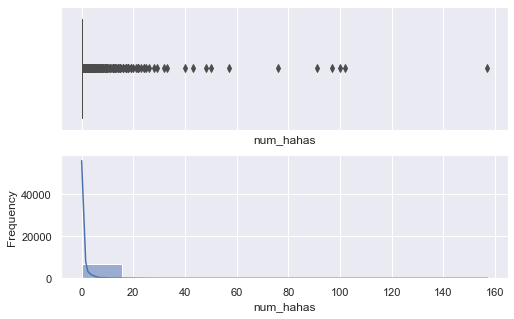

<Figure size 576x360 with 0 Axes>

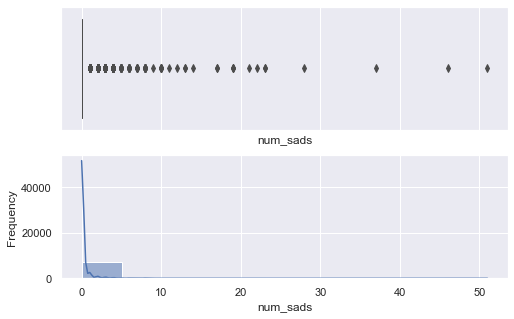

<Figure size 576x360 with 0 Axes>

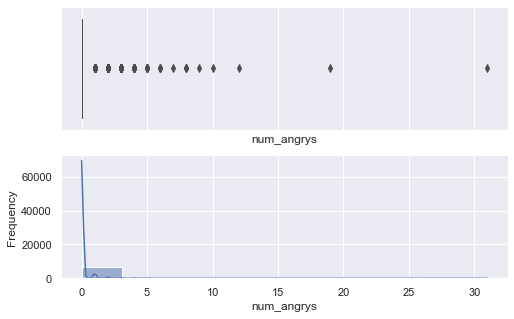

In [22]:
import warnings
warnings.filterwarnings("ignore")

num_cols = fbthai1.select_dtypes(include='number').columns.tolist()

for i in num_cols:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(fbthai1[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(fbthai1[i], ax=ax_hist , bins = 10,kde=True)

<Figure size 1440x1440 with 0 Axes>

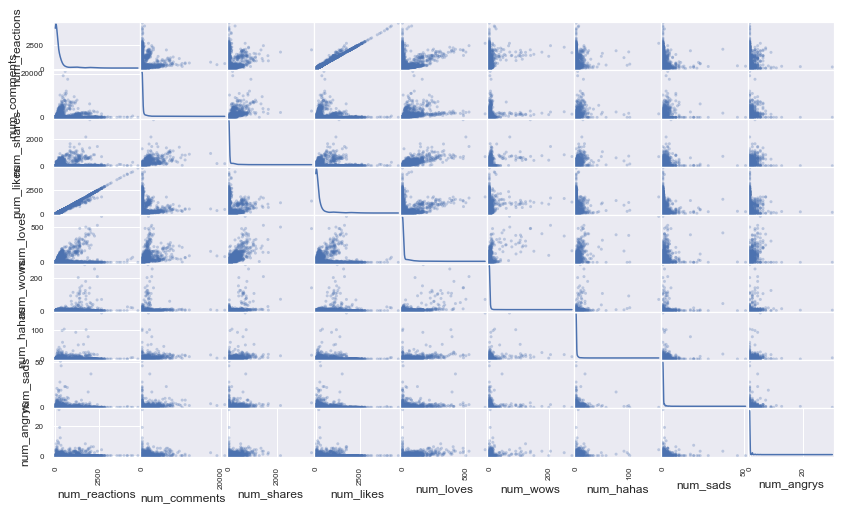

In [23]:
plt.figure(figsize=(20, 20))
pd.plotting.scatter_matrix(fbthai1, alpha=0.3, figsize=(14,8), diagonal='kde')
plt.show()

Podem observar que cap de les variables te distribució normal i que totes tenen outliers.

En primer lloc transformarem les variables categòriques a numèriques, en concret la variable status type:

In [24]:
fbthai1.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [25]:
fbthai1 = pd.get_dummies(fbthai1, prefix= 'type', columns = ["status_type"])
fbthai1

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,0,1,0,0
7046,16,0,0,14,1,0,1,0,0,0,1,0,0
7047,2,0,0,1,1,0,0,0,0,0,1,0,0
7048,351,12,22,349,2,0,0,0,0,0,1,0,0


A les numèriques els fem RobustScaler, ja que no tenen distribució normal i tenen outliers.

In [26]:
from sklearn.preprocessing import RobustScaler

columnsRobust = ['num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys']
scaler = preprocessing.RobustScaler().fit(fbthai1[columnsRobust])
fbthai1[columnsRobust] = scaler.transform(fbthai1[columnsRobust])

fbthai1.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,0,1
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,0,1
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0,1,0,0


Fem el PCA

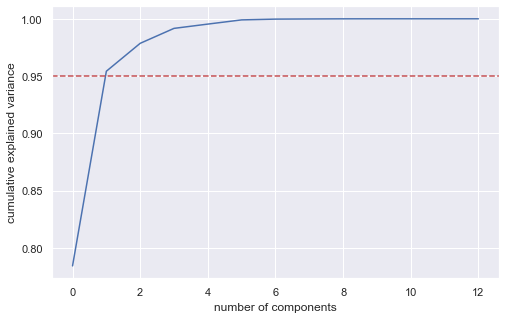

In [27]:
from sklearn.decomposition import PCA
pca = PCA().fit(fbthai1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

Busquem quants components hauria de tenir amb un 95% de PCA.

In [28]:
pca = PCA(.95).fit(fbthai1)
print(pca.n_components_)

2


Creem el model amb 2 components principals:

In [29]:
pca = PCA(n_components=2)
pca.fit(fbthai1)
df_pca = pd.DataFrame(pca.transform(fbthai1), columns=['Component 1', 'Component 2'], index=fbthai1.index)
df_pca.head()

,Component 1,Component 2
0,48.146219,39.281738
1,-14.876282,-2.242583
2,3.375964,3.441262
3,-14.880365,-2.249211
4,-14.270582,-1.396058


In [30]:
pca.explained_variance_ratio_.sum()

0.9542225231088448

Visualitzem les distribucions dels dos components:

<AxesSubplot:>

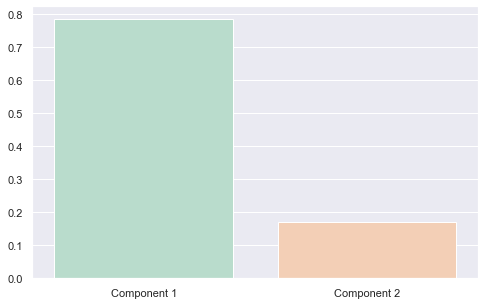

In [31]:
sns.barplot(x=['Component 1', 'Component 2'], y=pca.explained_variance_ratio_, palette='Pastel2')

Observem que el component principal 1 és el que predomina.

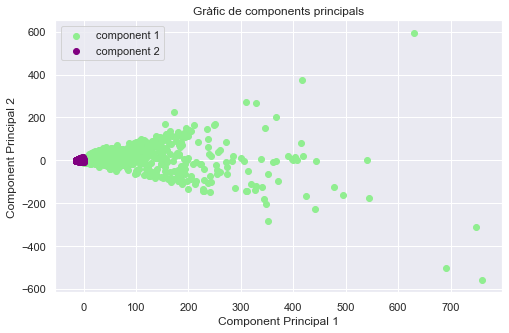

In [32]:
df_pca['component'] = np.where(df_pca['Component 1'] >= 0, 'Component 1', 'Component 2')

plt.scatter(df_pca.loc[df_pca['component']=='Component 1', 'Component 1'], 
            df_pca.loc[df_pca['component']=='Component 1', 'Component 2'], 
            color='lightgreen', label='component 1')
plt.scatter(df_pca.loc[df_pca['component']=='Component 2', 'Component 1'], 
            df_pca.loc[df_pca['component']=='Component 2', 'Component 2'], 
            color='purple', label='component 2')

plt.title('Gràfic de components principals')
plt.xlabel('Component Principal 1')
plt.ylabel('Component Principal 2')
plt.legend()
plt.show()

Instem el model K-Means i emprem el mètode Elbow method per veure quants clusters anirà millor seleccionar.

In [33]:
df_pca = df_pca.drop('component', axis=1)

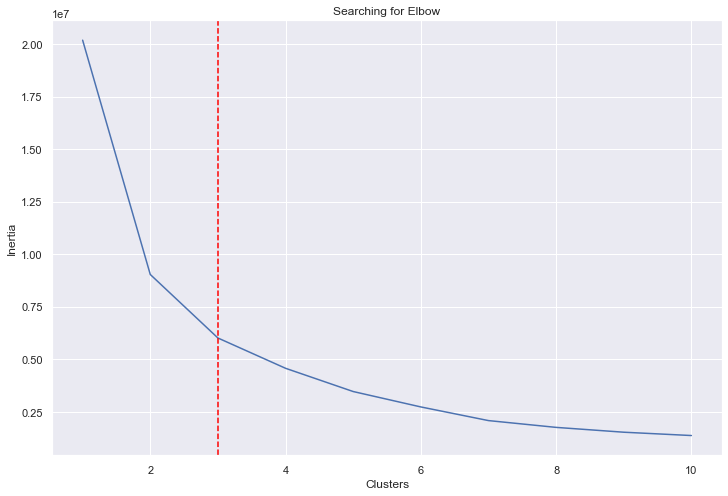

In [34]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(df_pca)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.axvline(x=3, linestyle='--', color='red')

plt.show()

Veiem que són aproximadament 3

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [36]:
kmeans.fit(df_pca)

KMeans(n_clusters=3, random_state=42)

In [37]:
labels = kmeans.predict(df_pca)
labels

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [38]:
centroids = kmeans.cluster_centers_

In [39]:
fbthai1['Cluster K-means'] = labels
fbthai1

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video,Cluster K-means
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,0,1,1
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,0,1,0
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.155779,-0.181818,0.00,0.193939,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0
7046,-0.211055,-0.181818,0.00,-0.260606,0.333333,0.0,1.0,0.0,0.0,0,1,0,0,0
7047,-0.281407,-0.181818,0.00,-0.339394,0.333333,0.0,0.0,0.0,0.0,0,1,0,0,0
7048,1.472362,0.363636,5.50,1.769697,0.666667,0.0,0.0,0.0,0.0,0,1,0,0,0


In [40]:
fbthai1['Cluster K-means'].value_counts()

0    6452
1     475
2      72
Name: Cluster K-means, dtype: int64

Podem observar que el cluster més gran és el primer.

Grafiquem els resultats

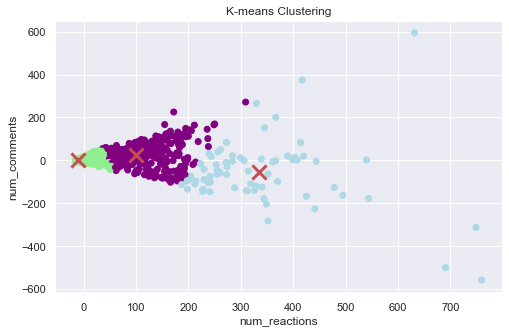

In [41]:
from matplotlib.colors import ListedColormap
cmap_colors = ListedColormap(['lightgreen', 'purple', 'lightblue'])
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=labels, cmap=cmap_colors)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('num_reactions')
plt.ylabel('num_comments')
plt.title('K-means Clustering')
plt.show()

Ara els tres clusters per separat

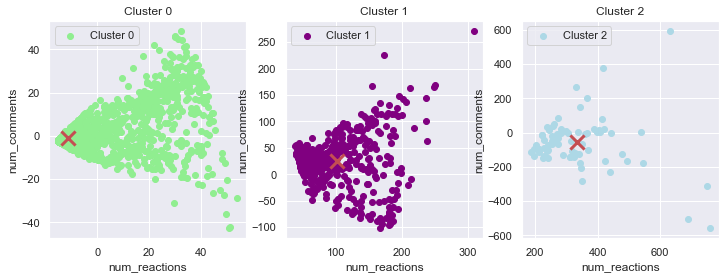

In [42]:
cmap_pastel = ListedColormap(['lightgreen', 'purple', 'lightblue'])
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i, ax in enumerate(axs):
    group = df_pca[labels == i]
    ax.scatter(group.iloc[:, 0], group.iloc[:, 1], color=cmap_pastel(i), label=f'Cluster {i}')
    ax.scatter(centroids[i, 0], centroids[i, 1], marker='x', s=200, linewidths=3, color='r')
    ax.set_xlabel('num_reactions')
    ax.set_ylabel('num_comments')
    ax.set_title(f'Cluster {i}')
    ax.legend()

Grafiquem boxplots de cada variable amb els tres clusters

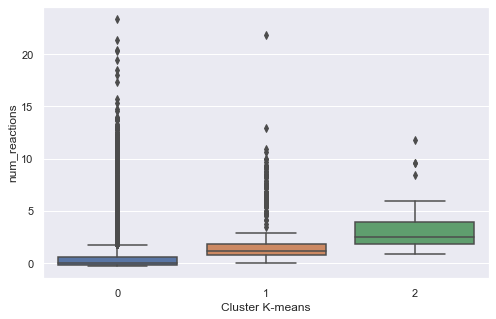

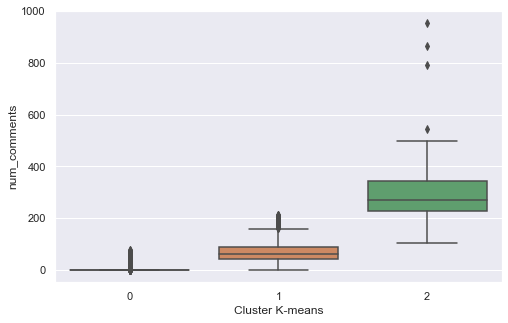

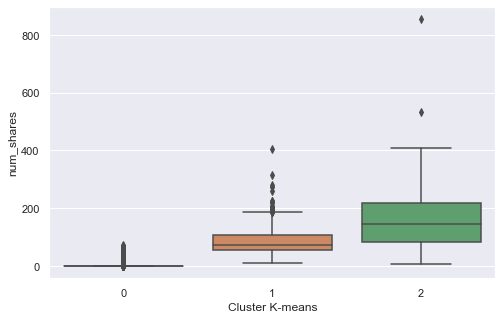

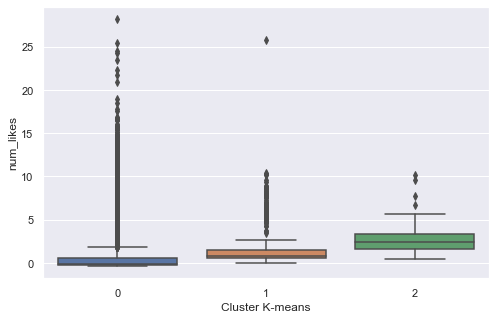

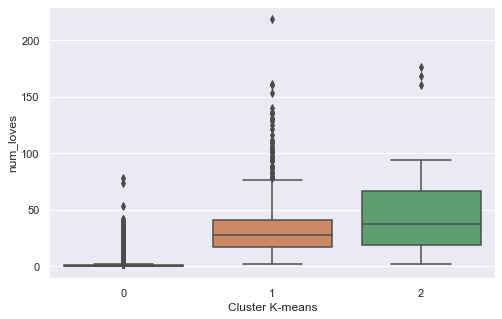

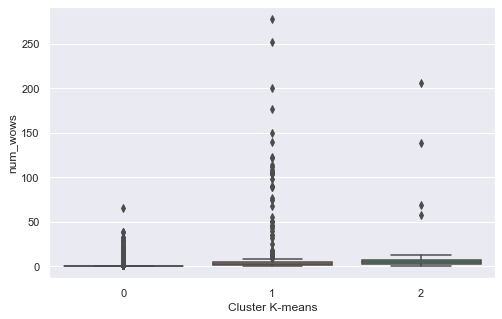

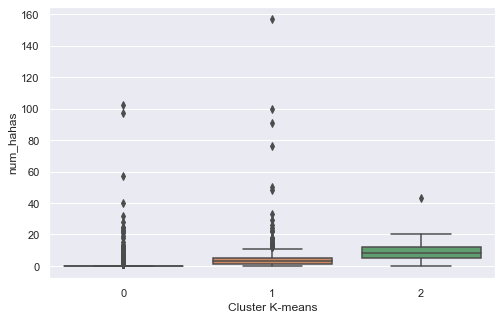

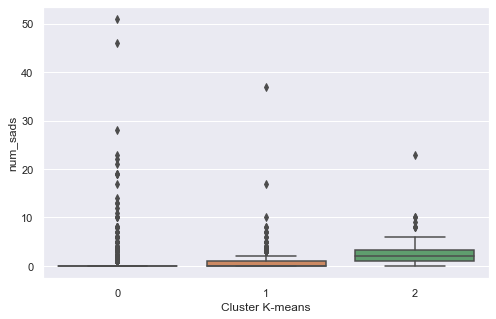

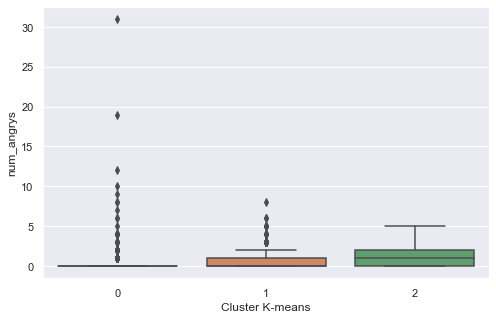

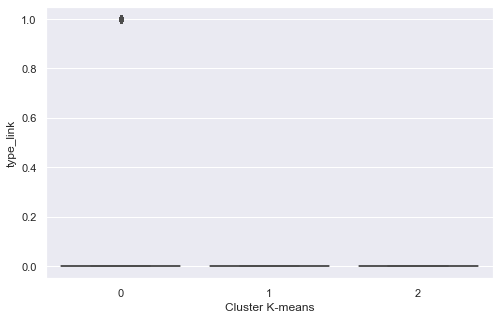

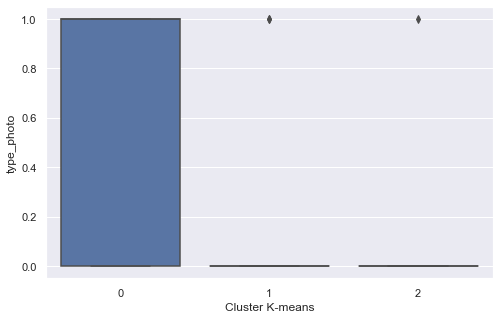

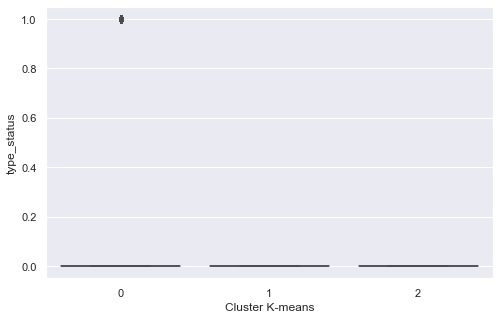

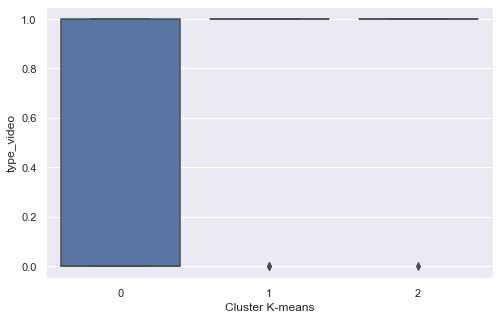

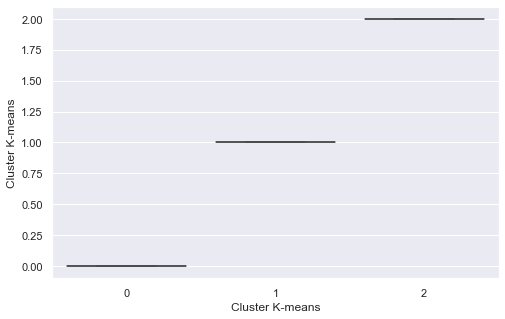

In [43]:
columns = fbthai1.columns

for i in columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(x='Cluster K-means', y=i, data=fbthai1)

### - Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

In [44]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

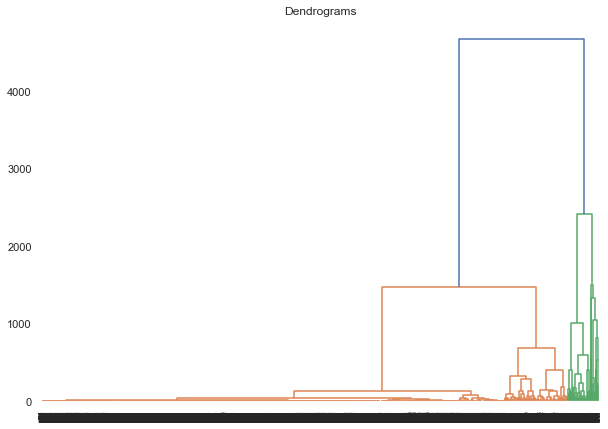

In [45]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_pca, method='ward'))

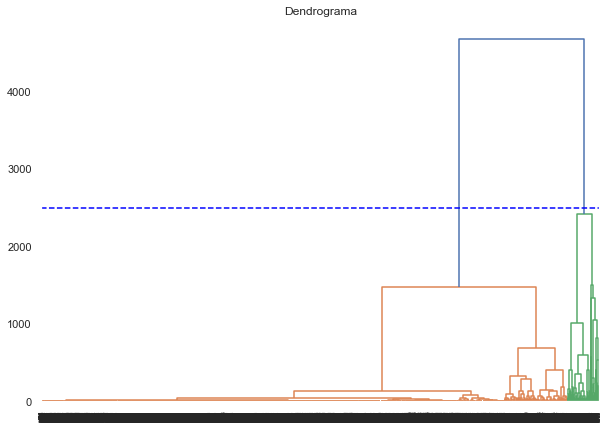

In [46]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma")  
dendrograma = shc.dendrogram(shc.linkage(df_pca, method='ward'))
plt.axhline(y=2500, color='blue', linestyle='--')

Veiem que la línia divideix el dendograma en 2 clusters

In [47]:
agglom = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
agglom.fit(df_pca)

agglom_pred = agglom.labels_

agglom_pred

array([1, 1, 1, ..., 1, 1, 1])

Aquí veiem les prediccions, en aquest cas 0 voldria dir que pertany al grup 1 i 1, al grup 2.

In [48]:
fbthai1['Cluster_Agglomerative'] = agglom_pred
fbthai1.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video,Cluster K-means,Cluster_Agglomerative
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,0,1,1,1
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0,1
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,0,1,0,1
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0,1
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0,1,0,0,0,1


In [49]:
fbthai1['Cluster_Agglomerative'].value_counts()

1    6602
0     397
Name: Cluster_Agglomerative, dtype: int64

En aquest cas el primer cluster també és el més gran.

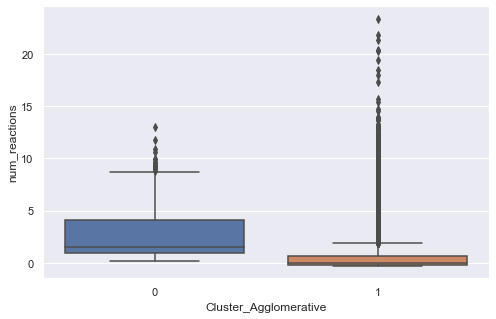

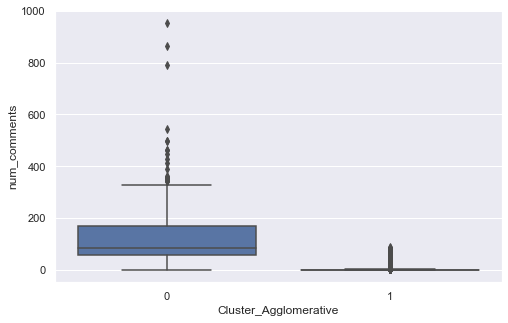

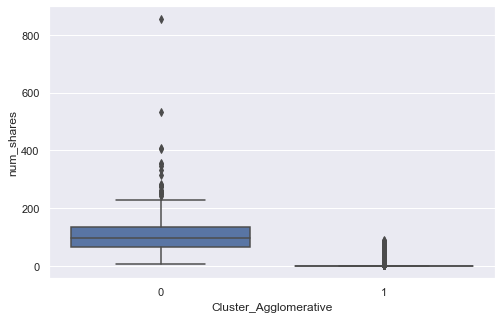

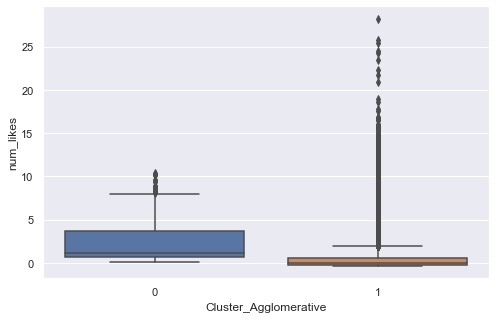

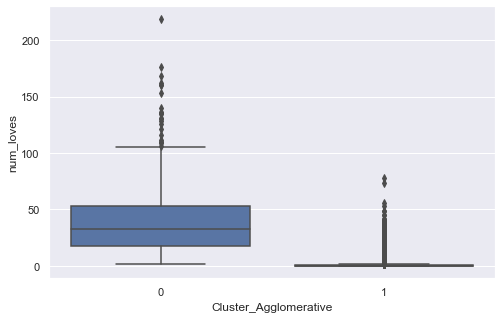

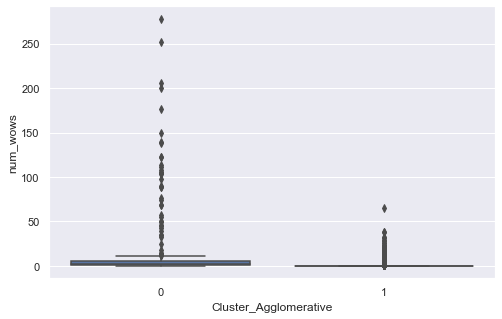

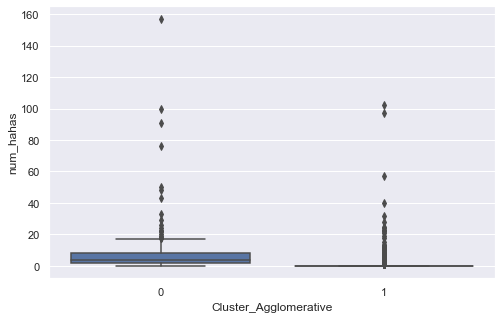

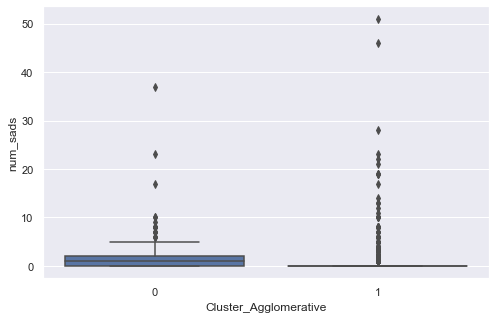

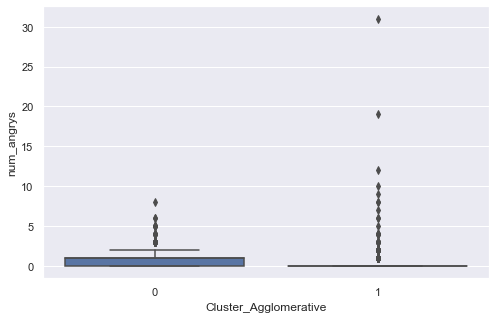

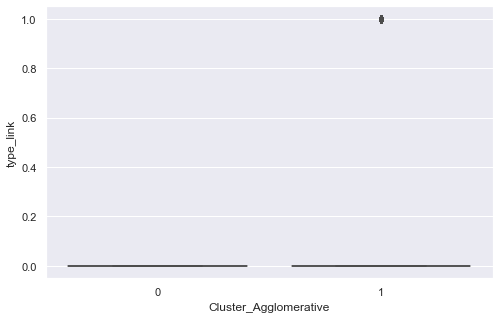

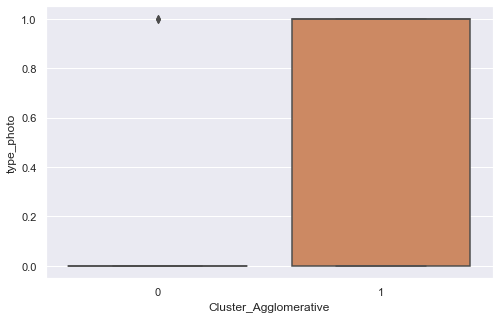

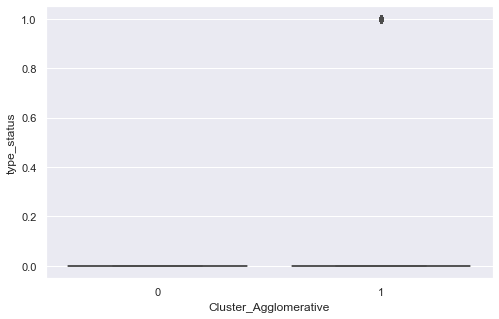

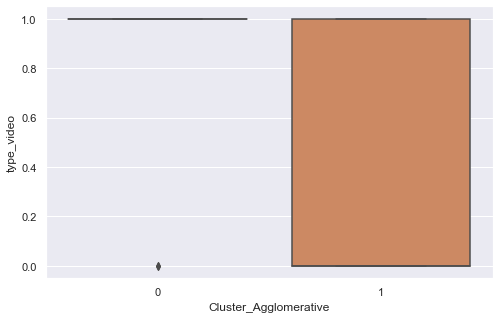

In [50]:
columns = fbthai1.columns[:-2]
   
for i in columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(x='Cluster_Agglomerative', y=i, data=fbthai1)


### - Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    score = silhouette_score(df_pca, kmeans.labels_)
    silhouette_coefficients.append(score)
    
print(silhouette_coefficients)

[0.9022843861200619, 0.8764975986456913, 0.8667497531835052, 0.8725192951520088, 0.8715132722869632, 0.8731362091659324, 0.8665432048773586, 0.866914782361744, 0.8595184022550922]


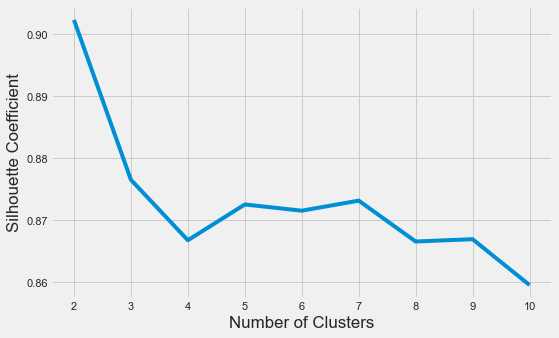

In [52]:
plt.style.use("fivethirtyeight")

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

El coeficient de silueta és una mesura de la cohesió i la separació del grup. Quantifica com de bé encaixa un punt de dades al grup assignat en funció de dos factors:

Com de prop hi ha el punt de dades d'altres punts al clúster.
A quina distància està el punt de dades dels punts en altres clústers.
Els valors del coeficient de silueta oscil·len entre -1 i 1. Els números més grans indiquen que les mostres estan més a prop dels seus conglomerats que d'altres conglomerats.

Quelcom que podem extreure del gràfic és que mostra que el coeficient de silueta és més gran quan k = 2, cosa que suggereix que aquest és el nombre òptim de clústers.

Tornem a buscar i gràficar els coeficients de silueta del model de Clustering jeràrquic

In [53]:
silhouette_coefficients = []

for k in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit(df_pca)
    score = silhouette_score(df_pca, agg.labels_)
    silhouette_coefficients.append(score)
    
print(silhouette_coefficients)

[0.8932110685609479, 0.8764860650538362, 0.8774893045404464, 0.8305990475482424, 0.8320697061216191, 0.8319394972248679, 0.8334124985020974, 0.8344035359832148, 0.8288971394894845]


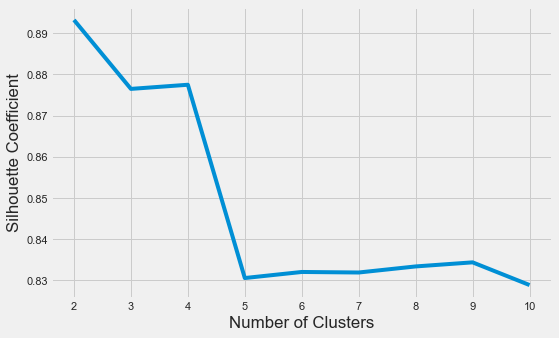

In [54]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Aquí també el gràfic suggereix que el nombre òptim de clusters és k=2. 

Obtenim ara els silhouette scores:

In [55]:
# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_pca)
kmeans_silhouette = silhouette_score(df_pca, kmeans.labels_)
print("KMeans Silhouette Score:", kmeans_silhouette)

KMeans Silhouette Score: 0.8764975986456913


In [56]:
# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(df_pca)
agg_silhouette = silhouette_score(df_pca, agg.labels_)
print("Agglomerative Clustering Silhouette Score:", agg_silhouette)

Agglomerative Clustering Silhouette Score: 0.8764860650538362


En aquest cas, el silhouette score del model K-Means és de 0.87 i el del Clustering jeràrquic també és de 0.87. Són uns bons resultats tenint en compte que la puntuació va de -1 a 1 i que com més s'apropi a l'1, millor és la qualitat de l'agrupació. Vol dir que els grups formats per l'algoritme són diferents i ben definits.

El silhouette score és una versió estandarditzada del coeficient de silueta i varia entre -1 i 1. Un valor de 1 indica que els clusters estan ben separats, mentre que un valor de -1 indica que els punts estan mal assignats als clusters. Un valor de 0 indica que els clústers se superposen o que hi ha punts equidistants entre dos o més clústers.

